In [1]:
import logging
import pandas as pd
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.INFO)

In [9]:
import downloader

In [10]:
import download_datasets

In [28]:
dfs=download_datasets.get_datasets()

2022-07-23 10:00:41,246 INFO root processing: data_sources/MaunaLoaCO2MonthlyMean.toml
2022-07-23 10:00:41,254 INFO root processing: data_sources/EuropeanMeanTemperatureSinceRomanTime_EuroMed2k.toml
2022-07-23 10:00:41,263 INFO root processing: data_sources/MaunaLoaCO2WeeklyMeanHistorical.toml
2022-07-23 10:00:42,819 INFO root processing: data_sources/WikipediaGeologicTimeScales.toml
2022-07-23 10:00:42,924 INFO root processing: data_sources/DWDGermanJuneMeanTemperature.toml
2022-07-23 10:00:42,928 INFO root processing: data_sources/11000yearsunspotnumber.toml
2022-07-23 10:00:42,932 INFO root processing: data_sources/DWDGermanAugustMeanTemperature.toml
2022-07-23 10:00:42,936 INFO root processing: data_sources/DWDGermanJulyMeanTemperature.toml
2022-07-23 10:00:42,939 INFO root processing: data_sources/SunspotsMonthlyMean.toml
2022-07-23 10:00:42,952 INFO root processing: data_sources/GISP2IceCoreTemperatureAlley2004.toml
2022-07-23 10:00:42,961 INFO root processing: data_sources/Early

In [29]:
dfs.keys()

dict_keys(['MaunaLoaMonthlyCO2', 'euromed2k', 'MaunaLoaWeeklyHistoricalCO2', 'geologictimescale', 'germany_june_meantemp', 'sunspots11000yrs', 'germany_august_meantemp', 'germany_july_meantemp', 'sunspotsmonthlymean1749', 'gisp2icecoretemp', 'gisp2icecoreaccum', 'CenozoicCO2', 'CenozoicCO2Filtered'])

In [30]:
dfs['MaunaLoaWeeklyHistoricalCO2']

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,NaN,NaN,50.40
1,1974,5,26,1974.3986,332.95,6,NaN,NaN,50.06
2,1974,6,2,1974.4178,332.35,5,NaN,NaN,49.60
3,1974,6,9,1974.4370,332.20,7,NaN,NaN,49.65
4,1974,6,16,1974.4562,332.37,7,NaN,NaN,50.06
...,...,...,...,...,...,...,...,...,...
2507,2022,6,5,2022.4260,421.30,6,419.61,395.92,138.40
2508,2022,6,12,2022.4452,421.03,6,419.00,396.07,138.50
2509,2022,6,19,2022.4644,420.87,7,418.62,395.92,138.77
2510,2022,6,26,2022.4836,420.31,7,418.14,395.36,138.69


In [10]:
em2k=dfs['euromed2k'].to_numpy()
gjmt6=dfs['germany_june_meantemp'].to_numpy()
gjmt7=dfs['germany_july_meantemp'].to_numpy()
gjmt8=dfs['germany_august_meantemp'].to_numpy()
sunsp=dfs['sunspots11000yrs'].to_numpy()
sunsp1749=dfs['sunspotsmonthlymean1749'].to_numpy()

In [11]:
sunsp[:,0]=1950-sunsp[:,0]

In [12]:
gjmt=(gjmt6[:-1,:]+gjmt7+gjmt8)/3.0

In [13]:
np.mean(gjmt[:,2])

17.553569739952717

In [14]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [15]:
gjmean=np.mean(gjmt[:,2])

In [16]:
win=10
em2kmat=moving_average(em2k[:,1],2*win+1)
gjmtmat=moving_average(gjmt[:,2]-gjmean,2*win+1)

In [17]:
sunma=moving_average(sunsp[:,1],2*win+1)
sunman=moving_average(sunsp1749[:,3],20*win+1)

In [18]:
sunman

array([76.14427861, 75.77910448, 75.3761194 , ..., 39.60099502,
       39.7800995 , 39.94577114])

In [19]:
sunman.shape, sunsp1749.shape

((3082,), (3282, 6))

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,8]  # inch! :-/

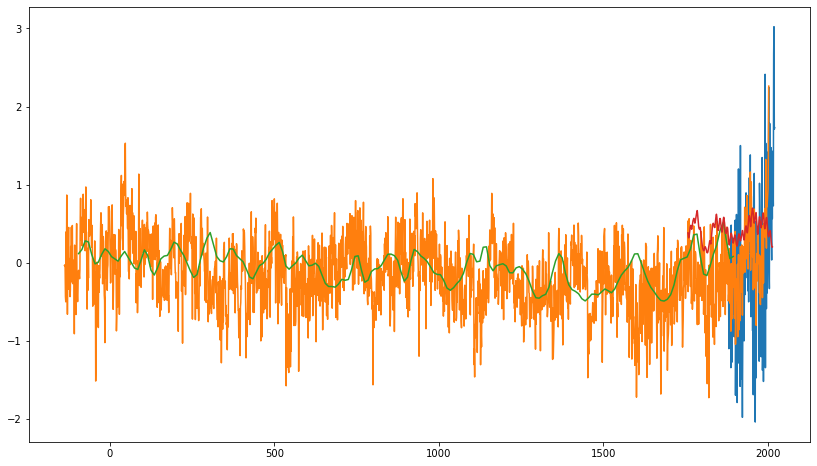

In [23]:
plt.plot(gjmt[:,0],gjmt[:,2]-gjmean)
plt.plot(em2k[:,0],em2k[:,1])
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/60-0.4)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200)

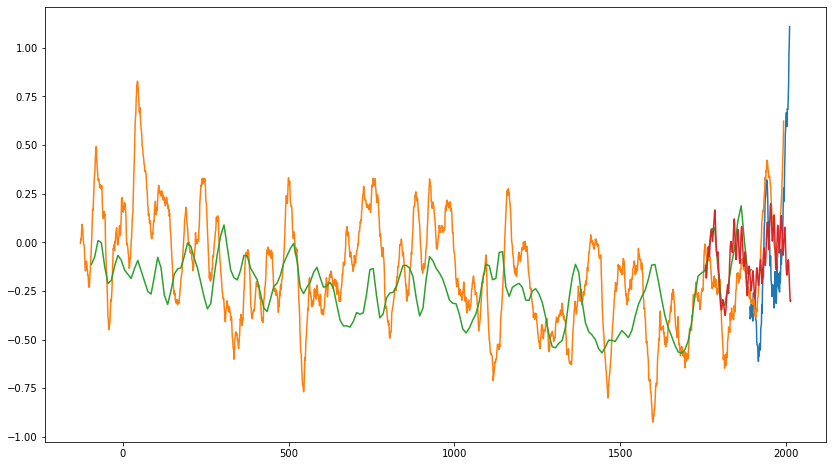

In [81]:
# plt.plot(dfnp[:,0],dfnp[:,1])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(em2k[win:-win,0],em2kmat)
plt.plot(sunsp[-200:,0],sunsp[-200:,1]/80-0.5) # sunma[-200:]/50-0.5)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200-0.5)

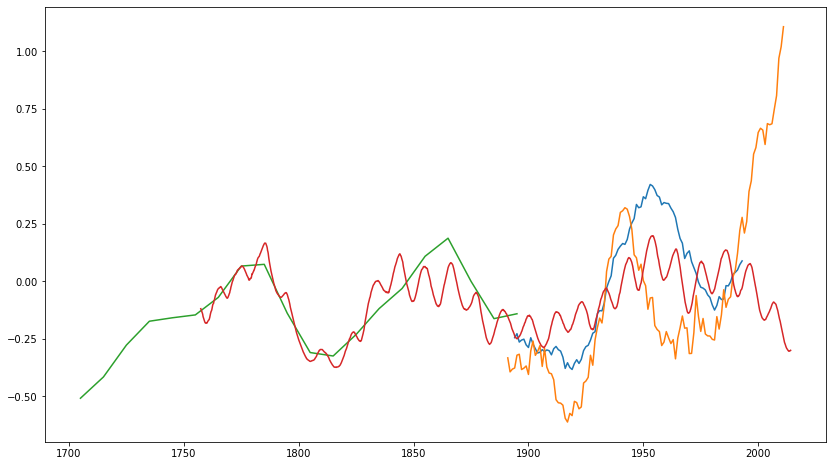

In [80]:
plt.plot(em2k[-120+win:-win,0],em2kmat[-120+win:-win])
plt.plot(gjmt[win:-win,0],gjmtmat)
plt.plot(sunsp[-20:,0],sunsp[-20:,1]/80-0.5) # sunma[-20:]/50-0.5)
plt.plot(sunsp1749[10*win:-10*win,2],sunman/200-0.5)

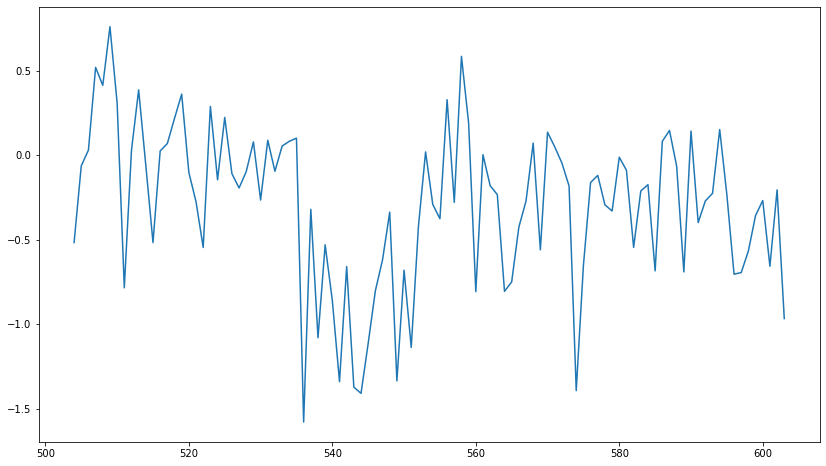

In [40]:
a=-1500
b=-1400
plt.plot(em2k[a:b,0],em2k[a:b,1])
plt.plot(gjmt[a:b,0],gjmtmat[a-win:b-win])
